# How to compute the FRC in just 20 lines of python

This paper introduced the continous FRC, which is quite simple to compute:

Closed-Form Expression of the Fourier Ring-Correlation for Single-Molecule Localization Microscopy
Thanh-An Pham, Emmanuel Soubies, Daniel Sage, Michael Unser. ISBI 2019 - IEEE International Symposium on Biomedical Imaging, Apr 2019, Venise, Italy.
https://hal.archives-ouvertes.fr/hal-02048083

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j0

def pairwise_dist(setA, setB):
    A,B = np.meshgrid(np.arange(len(setA)), np.arange(len(setB)))
    return np.sqrt(np.sum((setA[A] - setB[B])**2, -1))

def frc_bessel_sum(setA, setB, freq):
    dists = pairwise_dist(setA, setB).flatten()
    rho = freq * 2*np.pi
    return np.sum( j0(rho * dists[:,None]), 0)

def continuous_frc(pts,freq):
    setA = pts[::2]
    setB = pts[1::2]
    
    aa = frc_bessel_sum(setA,setA,freq)
    bb = frc_bessel_sum(setB,setB,freq)
    ab = frc_bessel_sum(setA,setB,freq)
    return ab/np.sqrt(aa*bb)

Testing the algorithm:

Resolution: 0.23873241463784298


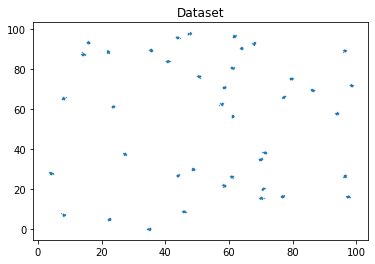

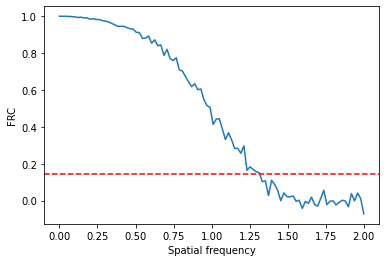

In [4]:
# Generate a bunch of ground truth points 
W = 100
N = 40
S = 20
gt = np.random.uniform(0,W,size=(N,2))

# Generate random distributions from those points as if noisy localization is done
loc_prec = 0.25 # localization precision
pts = np.repeat(gt, S, 0)
pts += np.random.normal(0, loc_prec,size=pts.shape)

plt.figure()
plt.scatter(pts[:,0],pts[:,1], s=0.5,marker='.')
plt.title('Dataset')

freq = np.linspace(0, 2, 100)
frc = continuous_frc(pts,freq)

plt.figure()
plt.plot(freq, frc)
plt.xlabel('Spatial frequency')
plt.ylabel('FRC')
plt.axhline(y=1/7, linestyle='--', c='r')

resolution = freq[np.where(frc < 1/7)[0][0]]
print(f"Resolution: {1/resolution/np.pi}") # not sure if all these factors make sense but the resolution matches the loc_prec